# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("/home/imman/Imman Codings/Chennai Housing Price/resources/chennai_sale.csv")

In [3]:
train.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
train.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [5]:
#Filling Nan Values
train['N_BEDROOM']=train['N_BEDROOM'].fillna(train['N_BEDROOM'].mean())
train['N_BATHROOM']=train['N_BATHROOM'].fillna(train['N_BATHROOM'].mean())
train['QS_OVERALL']=train['QS_OVERALL'].fillna(train['QS_OVERALL'].mean())


## Fixing Categorical Features

In [6]:
train = train.replace(to_replace=['Anna Nagar','Ann Nagar','Ana Nagar'],value='Anna Nagar')
train = train.replace(to_replace=['Adyr','Adyar'],value='Adyar')
train = train.replace(to_replace=['Karapakkam','Karapakam'],value='Karapakkam')
train = train.replace(to_replace=['Velachery','Velchery'],value='Velachery')
train = train.replace(to_replace=['TNagar','T Nagar'],value='T Nagar')
train = train.replace(to_replace=['Chrompt','Chrmpet','Chormpet'],value='Chrompet')
train = train.replace(to_replace=['KKNagar','KK Nagar'],value='KK Nagar')

In [7]:
train.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [8]:
train.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [9]:
train = train.replace(to_replace=['AbNormal','Ab Normal'],value='Abnormal')

train = train.replace(to_replace=['Partial','Partiall','PartiaLl'],value='partial')

train = train.replace(to_replace=['Adj Land','AdjLand'],value='Adj Land')

In [10]:
train.PARK_FACIL.unique()

train = train.replace(to_replace=['Noo','No'],value='No')

In [11]:
categorical = []
for column in train.columns:
    if train[column].dtype == 'object':
        categorical.append(column)
        
        

len(categorical)
print(categorical)
    

['PRT_ID', 'AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']


In [12]:
train.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [13]:
train = train.replace(to_replace=['Others','Other'],value='Others')
train = train.replace(to_replace=['Comercial'],value='Commercial')

In [14]:
train.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [15]:
train = train.replace(to_replace=['NoSeWa','NoSewr','NoSewr','NoSewr '],value='No Sewage')
train = train.replace(to_replace=['AllPub','All Pub'],value='All Pub')




In [16]:
train.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [17]:
train = train.replace(to_replace=['Pavd'],value='Paved')
train = train.replace(to_replace=['NoAccess'],value='No Access')


Text(0.5, 1.0, 'Area Location')

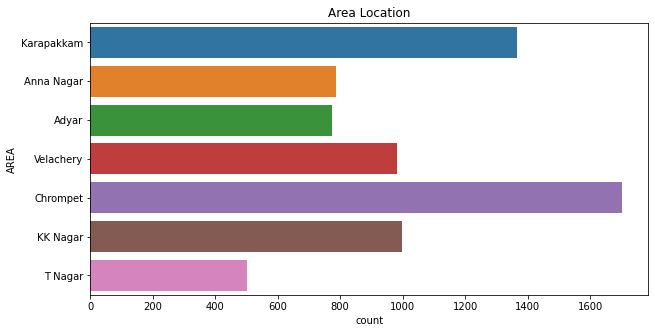

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=train,y=train['AREA'])
plt.title("Area Location")

Text(0.5, 1.0, 'Sales Condition')

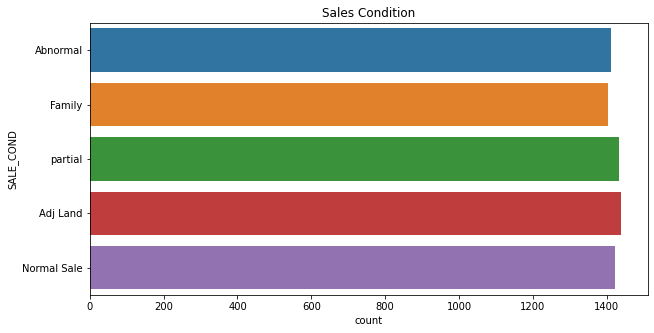

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=train,y=train['SALE_COND'])
plt.title("Sales Condition")

Text(0.5, 1.0, 'Build Type')

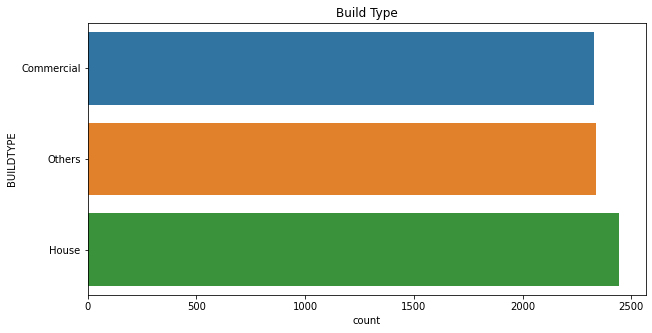

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=train,y=train['BUILDTYPE'])
plt.title("Build Type")

Text(0.5, 1.0, 'Street Type')

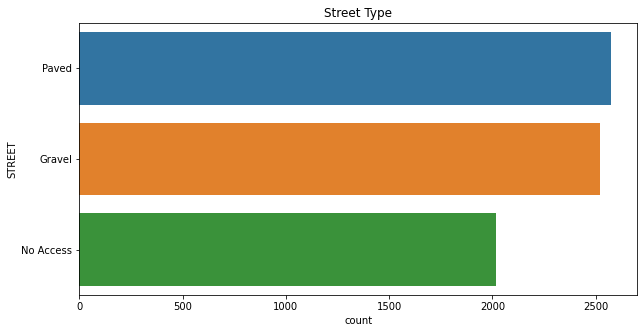

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data=train,y=train['STREET'])
plt.title("Street Type")


Text(0.5, 1.0, 'Street Type')

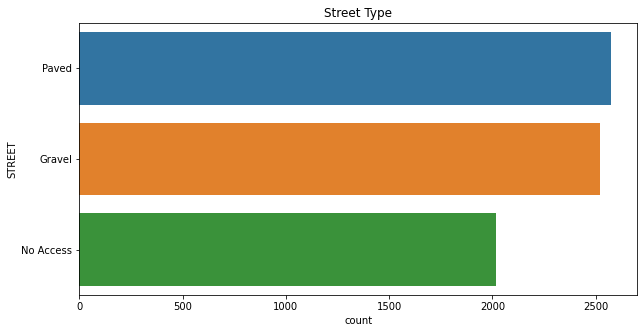

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=train,y=train['STREET'])
plt.title("Street Type")

## Numerical Columns

In [23]:
train.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

<AxesSubplot:xlabel='INT_SQFT', ylabel='Density'>

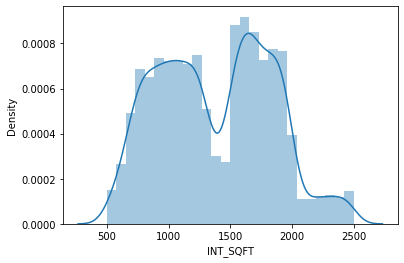

In [24]:
sns.distplot(train['INT_SQFT'])

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='Density'>

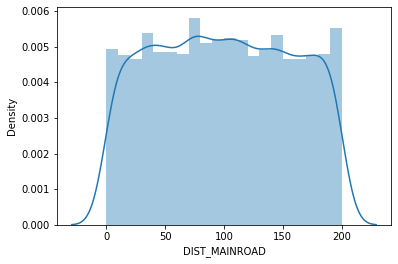

In [25]:
sns.distplot(train['DIST_MAINROAD'])

In [26]:
train['N_BEDROOM'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7109 entries, 0 to 7108
Series name: N_BEDROOM
Non-Null Count  Dtype  
--------------  -----  
7109 non-null   float64
dtypes: float64(1)
memory usage: 55.7 KB


In [27]:
train['N_BEDROOM'] = train['N_BEDROOM'].astype(int)

<AxesSubplot:xlabel='N_BEDROOM', ylabel='count'>

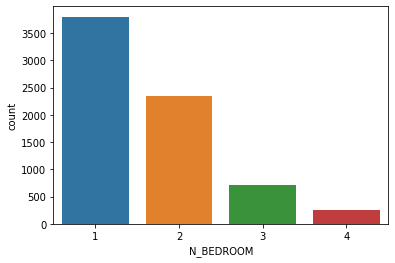

In [355]:
sns.countplot(train['N_BEDROOM'])

In [46]:
Area_Group = train.groupby(['AREA','MZZONE'])['PRT_ID'].count()
Area_Group=pd.DataFrame(Area_Group)
Area_Group.to_csv("Grouped_Area.csv")


In [29]:
train.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [30]:
train.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [356]:
train['N_BEDROOM'].value_counts()

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

In [357]:
total_columns = train.columns

In [358]:
total_columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [359]:
import plotly.express as px

In [360]:
px.scatter(train,x='AREA',y='SALES_PRICE')

In [361]:
px.histogram(train,x='INT_SQFT',y='SALES_PRICE',color='AREA')

In [362]:
px.histogram(train,x='INT_SQFT',y='SALES_PRICE',color='AREA')


In [363]:
train['DATE_SALE']=pd.to_datetime(train['DATE_SALE'],dayfirst=True)

train['Year Sale'] = train['DATE_SALE'].dt.year


train['DATE_BUILD']=pd.to_datetime(train['DATE_BUILD'],dayfirst=True)
train['Year Build'] = train['DATE_BUILD'].dt.year



In [364]:
px.line(train,x="Year Build",y="SALES_PRICE",color='Year Build')

In [365]:
px.line(train,y="Year Sale",x="SALES_PRICE",color='Year Sale',title="Year of the Sale against Sale Price")

# TO finish

In [366]:
train["SALES_PRICE_LAKHS"] = round(train['SALES_PRICE']/1000000,2)

In [367]:
train["SALES_PRICE_LAKHS"]

0        7.60
1       21.72
2       13.16
3        9.63
4        7.41
        ...  
7104     5.35
7105    10.82
7106     8.35
7107     8.51
7108     9.98
Name: SALES_PRICE_LAKHS, Length: 7109, dtype: float64

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE_LAKHS'>

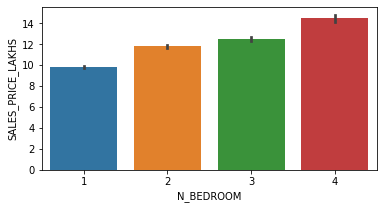

In [368]:

train['N_BATHROOM']=train['N_BATHROOM'].astype(int)
train['N_BEDROOM']=train['N_BEDROOM'].astype(int)

plt.figure(figsize=(6,3))
sns.barplot(y="SALES_PRICE_LAKHS",x="N_BEDROOM",data=train)

<AxesSubplot:xlabel='N_BATHROOM', ylabel='SALES_PRICE_LAKHS'>

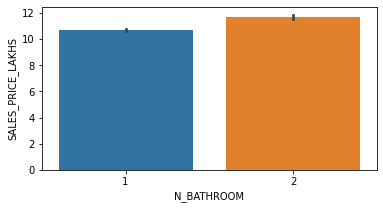

In [369]:
plt.figure(figsize=(6,3))
sns.barplot(y="SALES_PRICE_LAKHS",x="N_BATHROOM",data=train)


<AxesSubplot:xlabel='N_ROOM', ylabel='SALES_PRICE_LAKHS'>

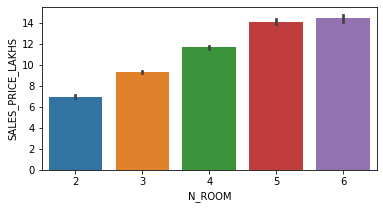

In [370]:
plt.figure(figsize=(6,3))
sns.barplot(y="SALES_PRICE_LAKHS",x="N_ROOM",data=train)


<AxesSubplot:xlabel='PARK_FACIL', ylabel='SALES_PRICE_LAKHS'>

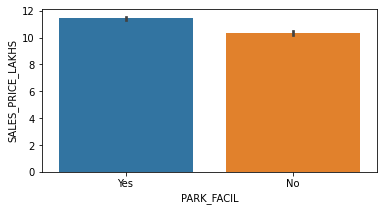

In [371]:
plt.figure(figsize=(6,3))
sns.barplot(y="SALES_PRICE_LAKHS",x="PARK_FACIL",data=train)
#Parking Faculty

<AxesSubplot:xlabel='BUILDTYPE', ylabel='SALES_PRICE_LAKHS'>

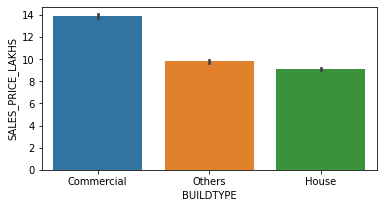

In [372]:
plt.figure(figsize=(6,3))
sns.barplot(y="SALES_PRICE_LAKHS",x="BUILDTYPE",data=train)

<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='SALES_PRICE_LAKHS'>

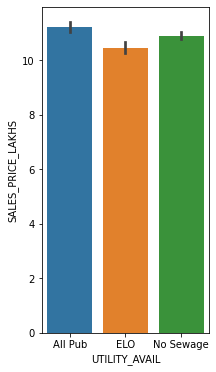

In [373]:
plt.figure(figsize=(3,6))
sns.barplot(y="SALES_PRICE_LAKHS",x="UTILITY_AVAIL",data=train)

<AxesSubplot:xlabel='STREET', ylabel='SALES_PRICE_LAKHS'>

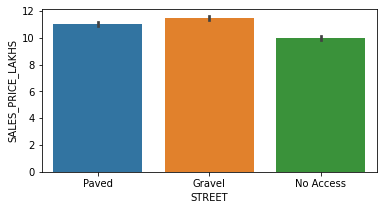

In [374]:
plt.figure(figsize=(6,3))
sns.barplot(y="SALES_PRICE_LAKHS",x="STREET",data=train)

<AxesSubplot:xlabel='MZZONE', ylabel='SALES_PRICE_LAKHS'>

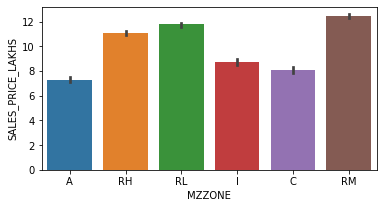

In [375]:
plt.figure(figsize=(6,3))
sns.barplot(y="SALES_PRICE_LAKHS",x="MZZONE",data=train)

In [376]:
from sklearn.preprocessing import LabelEncoder


In [377]:
le = LabelEncoder()

In [378]:
train.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'Year Sale', 'Year Build', 'SALES_PRICE_LAKHS'],
      dtype='object')

In [379]:
train.drop(['PRT_ID','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1,inplace=True)

# Cleaned Csv File Export

In [380]:
train.to_csv('cleaned.csv')
print("Cleaned Data Exported sucessfuly as cleaned.csv")
print("***********************************************")

Cleaned Data Exported sucessfuly as cleaned.csv
***********************************************


In [381]:
#Label Encoder
for column in train.columns:
    if train[column].dtype == object:
        train[column] = le.fit_transform(train[column])

In [382]:
#AREA, #MZZone ,BUILDTYPE

In [383]:
from sklearn.model_selection import train_test_split

In [384]:
X = train.drop(['SALES_PRICE','SALES_PRICE_LAKHS','DATE_SALE','DATE_BUILD','REG_FEE','COMMIS'],axis=1)
Y = train.SALES_PRICE

In [385]:
X.STREET.unique()

array([2, 0, 1])

In [386]:
raw = pd.read_csv("cleaned.csv")

In [387]:
raw.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [388]:
train.STREET.unique()

array([2, 0, 1])

In [389]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=124)

In [390]:
from sklearn import feature_selection

In [391]:
orginalfeatures = train.columns
print("Orginal Features Count : ",len(orginalfeatures))


Orginal Features Count :  20


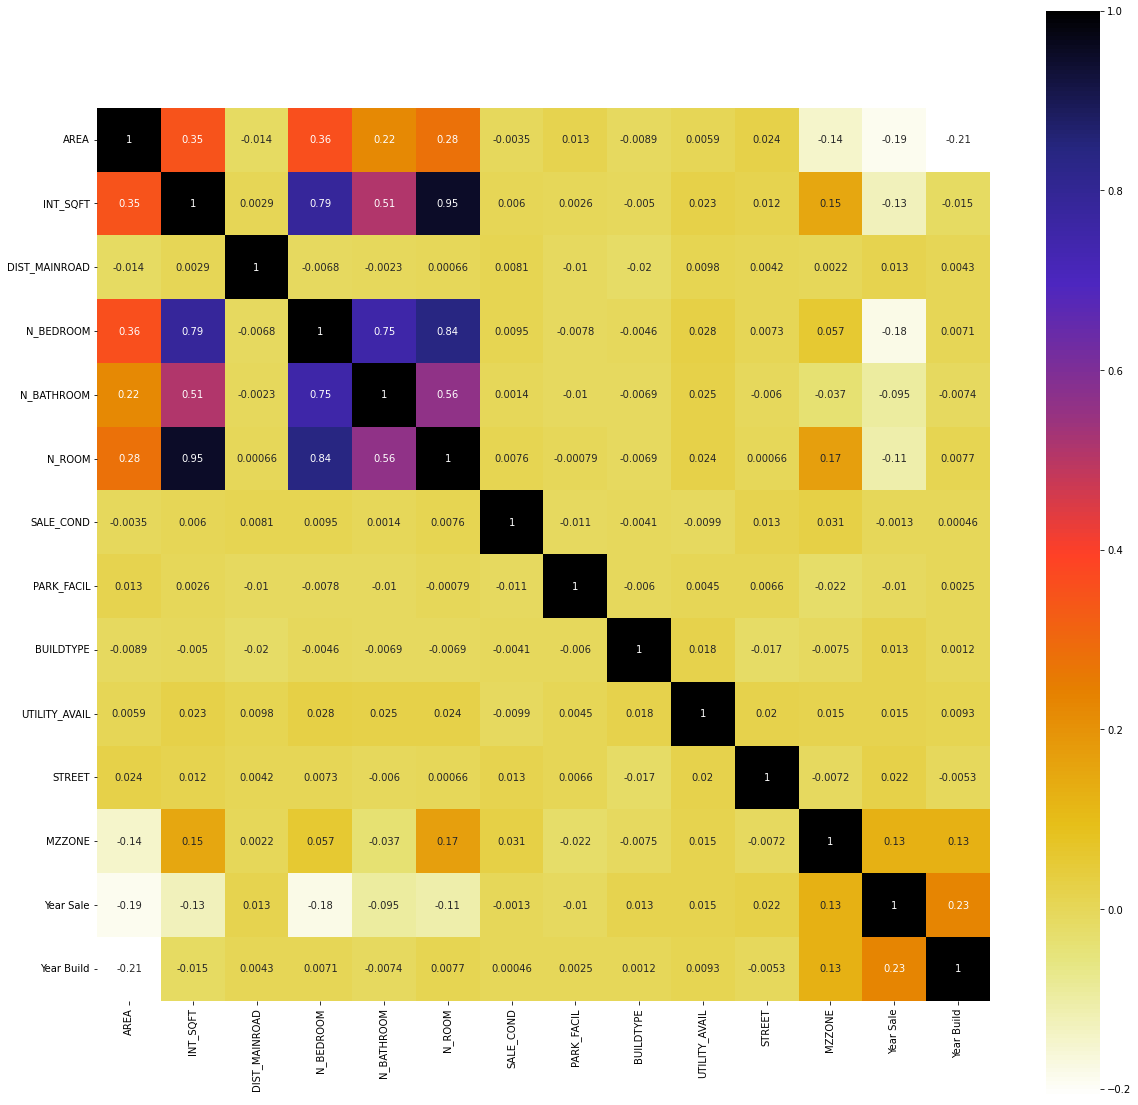

In [392]:
plt.figure(figsize=(20,20))
cor = x_train.corr()
sns.heatmap(cor,annot=True,square=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [393]:
def correlation(dataset,threshold):
    col_corr =set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr        

        
    

In [394]:
corr_features = correlation(x_test,0.9)

In [395]:
len(corr_features)

1

In [396]:
corr_features

{'N_ROOM'}

In [397]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression

In [398]:
x_train

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,Year Sale,Year Build
3169,0,968,27,1,1,3,0,1,0,0,2,5,2007,1979
3591,5,1695,194,1,1,4,1,1,1,2,0,3,2006,1984
2400,0,1159,140,1,1,3,3,1,1,0,0,4,2008,1968
3281,3,1350,63,2,1,4,2,1,0,2,2,5,2011,1992
4814,1,1536,191,1,1,4,2,0,2,2,0,4,2014,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,6,1845,45,3,2,5,4,1,2,2,0,3,2005,1982
135,2,711,116,1,1,2,1,1,2,2,1,4,2014,2002
6161,0,1150,170,1,1,3,2,0,0,1,1,2,2011,1999
4764,1,1956,64,2,1,5,1,0,2,2,2,4,2011,1983


In [399]:
sel = SelectKBest(r_regression,k=2)

In [400]:
raw.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [401]:
train.STREET.unique()

array([2, 0, 1])

# Machine Learning Models

## Lasso Regression 

In [402]:
from sklearn.linear_model import Lasso

In [403]:
#fitting the model
lasso = Lasso()
lasso.fit(x_train,y_train)


#predicting the model
ypred = lasso.predict(x_test)
lasso_score = lasso.score(x_test,y_test)*100
print("Lasso Regression score is ",lasso_score)






Lasso Regression score is  79.84565760504293


## Ridge Regression

In [404]:
from sklearn.linear_model import Ridge

In [405]:
ridge = Ridge()
ridge.fit(x_train,y_train)


#predicting the model
ypred = ridge.predict(x_test)
ridge_score = ridge.score(x_test,y_test)*100
print("Ridge Regression score is ",ridge_score)


Ridge Regression score is  79.8453343035567


## DecisionTreeRegressor

In [406]:
from sklearn.tree import DecisionTreeRegressor


In [407]:
#fitting the model
decisiontree = DecisionTreeRegressor()
decisiontree.fit(x_train,y_train)

#predicting 
decisiontree_score = decisiontree.score(x_test,y_test)*100
print("Decision Tree score is",decisiontree_score)




Decision Tree score is 96.28137521841576


## RandomForest

In [408]:
from sklearn.ensemble import RandomForestRegressor

In [409]:
#Fitting the model
randomforest = RandomForestRegressor(max_depth=16,n_estimators=180,random_state=15)
randomforest.fit(x_train,y_train)

ypred = randomforest.predict(x_test)
randomforestscore = randomforest.score(x_test,y_test)*100
print("Random Forest Square is  :",randomforestscore)

Random Forest Square is  : 98.27951847856211


## AdaBoost

In [410]:
from sklearn.ensemble import AdaBoostRegressor

In [411]:
#fitting the model
adaboost = AdaBoostRegressor(random_state=15,n_estimators=130)
adaboost.fit(x_train,y_train)

#predicting the model
adaboostscore = adaboost.score(x_test,y_test)*100
adaboostscore

88.93025413017828

# Model Scores

In [412]:
print("Lasso Regression score is ",lasso_score)
print("Ridge Regression score is ",ridge_score)
print("Decision Tree score is ",decisiontree_score)
print("RandomForest Regression score is ",randomforestscore)
print("Adaboost Regression score is ",adaboostscore)

Lasso Regression score is  79.84565760504293
Ridge Regression score is  79.8453343035567
Decision Tree score is  96.28137521841576
RandomForest Regression score is  98.27951847856211
Adaboost Regression score is  88.93025413017828


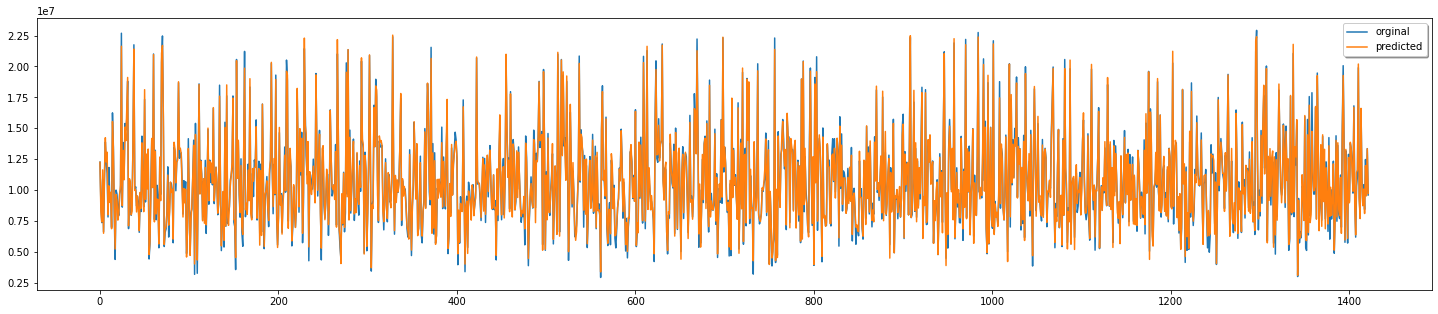

In [413]:
## Ploting the randomforest
plt.figure(figsize=(25,5))
x_ax = range(len(y_test))
plt.plot(x_ax,y_test,label='orginal')
plt.plot(x_ax,ypred,label='predicted')
plt.legend(loc='best',fancybox=True,shadow=True)
#plt.grid(True)
plt.show()

In [414]:
#Feature importance
feature_scores = pd.Series(randomforest.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores=feature_scores*100
feature_scores



INT_SQFT         39.637225
BUILDTYPE        31.717781
MZZONE           12.037236
AREA              7.767857
N_BEDROOM         3.054230
PARK_FACIL        1.483803
N_ROOM            1.097230
N_BATHROOM        1.043387
STREET            0.773861
Year Build        0.554649
DIST_MAINROAD     0.322897
SALE_COND         0.219858
Year Sale         0.191434
UTILITY_AVAIL     0.098555
dtype: float64

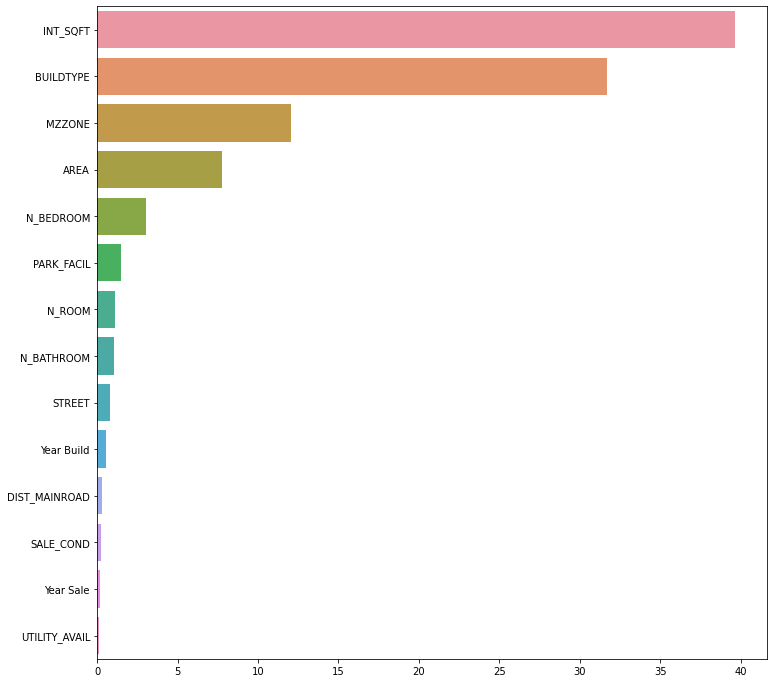

In [415]:
plt.figure(figsize=(12,12))
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.show()

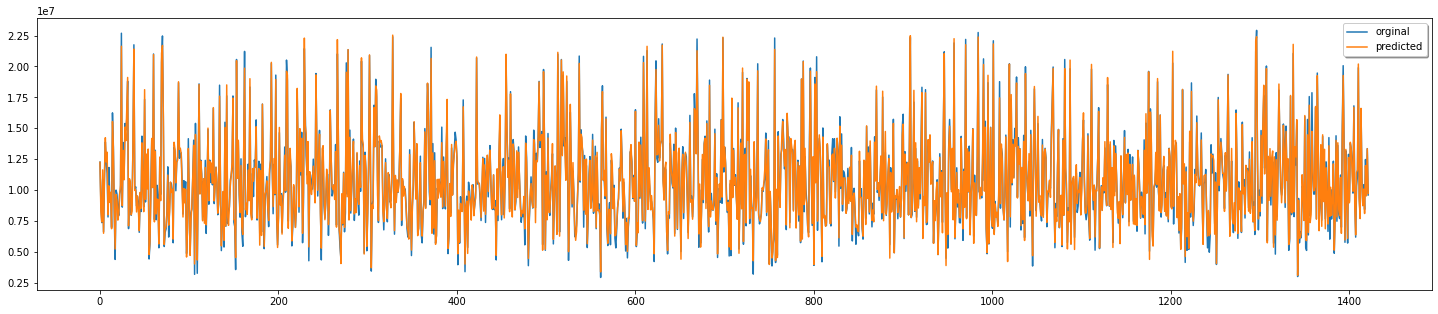

In [416]:
plt.figure(figsize=(25,5))
x_ax = range(len(y_test))
plt.plot(x_ax,y_test,label='orginal')
plt.plot(x_ax,ypred,label='predicted')
plt.legend(loc='best',fancybox=True,shadow=True)
#plt.grid(True)
plt.show()

In [417]:
main_features = feature_scores.loc[feature_scores > 1.4]
main_features 

INT_SQFT      39.637225
BUILDTYPE     31.717781
MZZONE        12.037236
AREA           7.767857
N_BEDROOM      3.054230
PARK_FACIL     1.483803
dtype: float64

In [418]:
main_features = main_features.index


In [419]:
main_features

Index(['INT_SQFT', 'BUILDTYPE', 'MZZONE', 'AREA', 'N_BEDROOM', 'PARK_FACIL'], dtype='object')

In [420]:
X = train[main_features]

In [421]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=15)

In [422]:
x_train.shape

(5687, 6)

In [423]:
y_train.shape

(5687,)

# Finalized Model

In [424]:
#Fitting the model
randomforest = RandomForestRegressor(max_depth=16,n_estimators=140,random_state=14)
randomforest.fit(x_train,y_train)

ypred = randomforest.predict(x_test)
randomforestscore = randomforest.score(x_test,y_test)*100
print("Random Forest Square is  :",randomforestscore)

Random Forest Square is  : 97.06213565681378


In [425]:
x_train

,INT_SQFT,BUILDTYPE,MZZONE,AREA,N_BEDROOM,PARK_FACIL
6081,1554,1,2,6,2,0
2642,2000,0,3,6,3,1
5580,1636,1,3,1,1,1
6977,1601,2,5,3,2,0
1041,1623,2,4,6,2,0
...,...,...,...,...,...,...
2715,831,1,1,0,1,1
2204,1448,0,5,4,2,0
6528,698,2,1,0,1,0
2693,1189,0,5,2,1,1


In [426]:
randomforest.predict([[659,1,3,4,1,0]])

array([5259690.86309524])

In [427]:
#Currency Conversion
from babel.numbers import format_currency

In [428]:
valu=randomforest.predict([[1500,1,2,3,2,1]])
low=int(valu-(valu*0.02))
low = format_currency(low, 'INR', locale='en_IN')



high=int(valu+(valu*0.02))
high = format_currency(high, 'INR', locale='en_IN')
print('Estimated value is:',low , 'to', high)

Estimated value is: ₹82,17,107.00 to ₹85,52,499.00


# Data Export 

In [429]:
import pickle


#Writing Pickle File
with open('model_pkl','wb') as f:
    pickle.dump(randomforest,f)
    print("Model Saved Successfuly as model_pkl")
    print("************************************")


#Thank You Eda completed by Immanuel


Model Saved Successfuly as model_pkl
************************************
